<a href="https://colab.research.google.com/github/Balbuenar/Unclassified--repo/blob/master/Copy_of_petrol_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libreries
To import necessary libraries for this task, execute the following import statements:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
dataset = pd.read_csv("/content/gdrive/MyDrive/petrol_consumption.csv")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let do some data exploration

In [6]:
dataset.shape

(48, 5)

The dataset has 48 rows and 5 columns

In [7]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [8]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


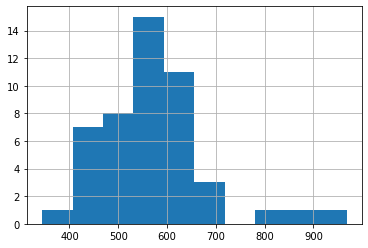

In [9]:
dataset.Petrol_Consumption.hist();

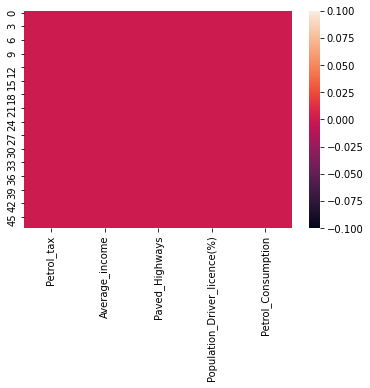

In [10]:
import seaborn as sns
sns.heatmap(dataset.isnull())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


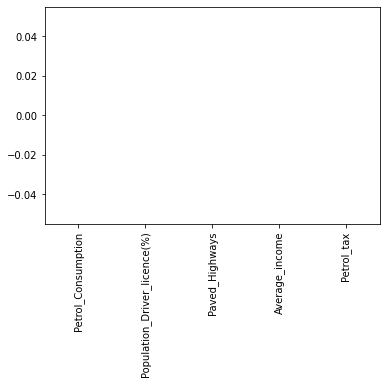

In [11]:
null_values=dataset.isnull().sum().sort_values(ascending=False)
ax=sns.barplot(null_values.index,null_values.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
import matplotlib.pyplot as plt
plt.show()

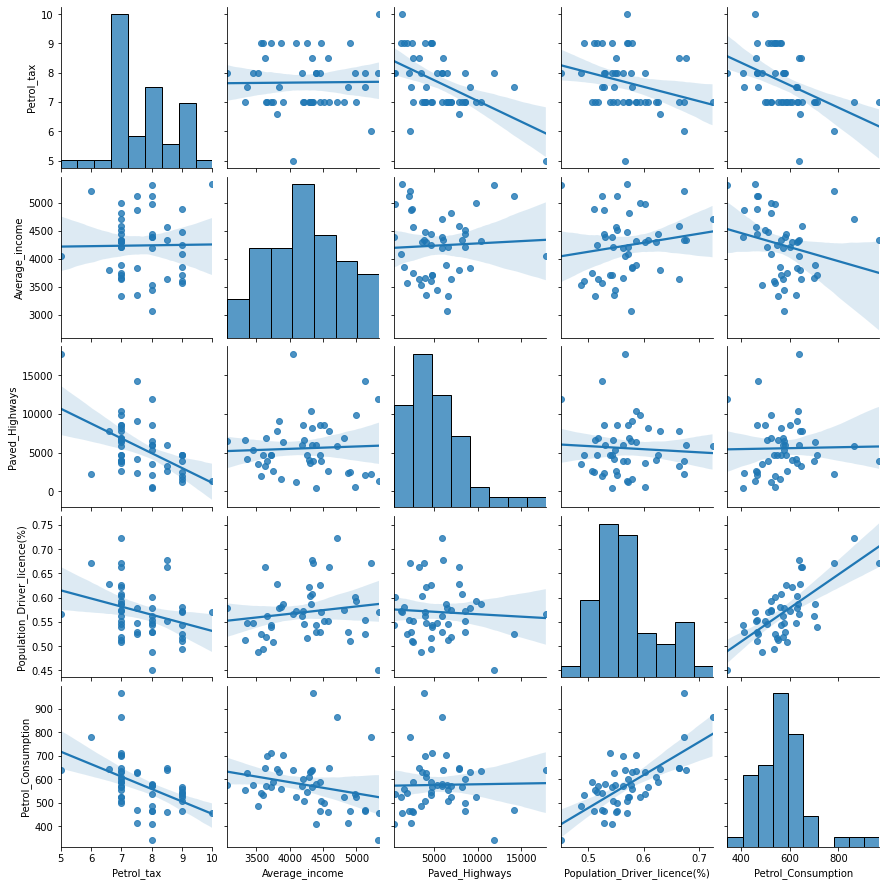

In [31]:
import seaborn as sns
sns.pairplot(dataset,kind="reg")

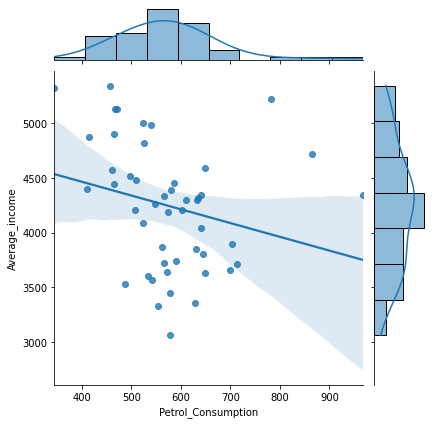

In [32]:
sns.jointplot(x="Petrol_Consumption",y="Average_income",data=dataset,kind="reg")

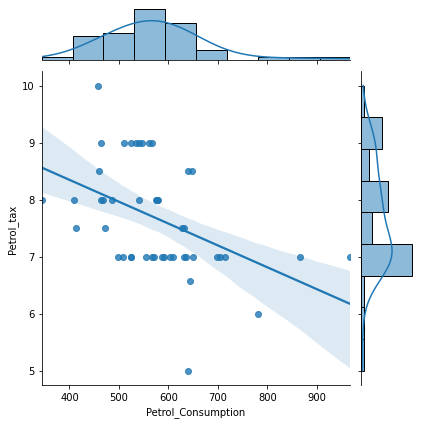

In [33]:
sns.jointplot(x="Petrol_Consumption",y="Petrol_tax",data=dataset,kind="reg")

In [35]:
## Linear Regression alternative 1
import statsmodels.api as sm
X=dataset[["Petrol_tax"]]
X[0:5]
X=sm.add_constant(X)
X[0:5]
y=dataset["Petrol_Consumption"]
lm=sm.OLS(y,X)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     11.76
Date:                Sat, 26 Dec 2020   Prob (F-statistic):            0.00128
Time:                        23:43:47   Log-Likelihood:                -288.58
No. Observations:                  48   AIC:                             581.2
Df Residuals:                      46   BIC:                             584.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        984.0076    119.624      8.226      0.000     743.218    1224.797
Petrol_tax   -53.1063     15.484     -3.430      0.001     -84.273     -21.939
==============================================================================
Omnibus:                       13.679   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.100
Skew:                           0.899   Prob(JB):                     7.12e-05
Kurtosis:                       5.514   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
## Linear regression alternative 2
import statsmodels.formula.api as smf
lm=smf.ols("Petrol_Consumption ~ Petrol_tax",dataset)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     11.76
Date:                Sat, 26 Dec 2020   Prob (F-statistic):            0.00128
Time:                        23:45:10   Log-Likelihood:                -288.58
No. Observations:                  48   AIC:                             581.2
Df Residuals:                      46   BIC:                             584.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    984.0076    119.624      8.226      0.000     743.218    1224.797
Petrol_tax   -53.1063     15.484     -3.430      0.001     -84.273     -21.939
==============================================================================
Omnibus:                       13.679   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.100
Skew:                           0.899   Prob(JB):                     7.12e-05
Kurtosis:                       5.514   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model.params

Intercept     984.007628
Petrol_tax    -53.106298
dtype: float64

In [38]:
print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    984.0076    119.624      8.226      0.000     743.218    1224.797
Petrol_tax   -53.1063     15.484     -3.430      0.001     -84.273     -21.939


In [39]:
## Confidence Interval for data's parameters
model.conf_int()

,0,1
Intercept,743.21779,1224.797465
Petrol_tax,-84.27315,-21.939446


In [40]:
## Model's f p-value
model.f_pvalue

0.0012848906734289288

In [41]:
print("f_pvalue: ","%.4f"%model.f_pvalue)

f_pvalue:  0.0013


In [42]:
print("fvalue: ","%.2f"%model.fvalue)

fvalue:  11.76


In [43]:
## T value for intercept
print("tvalue: ","%.2f"%model.tvalues[0:1])

tvalue:  8.23


In [44]:
## T value for first paramater Petrol Tax
print("tvalue: ","%.2f"%model.tvalues[1:2])

tvalue:  -3.43


In [45]:
## R squared score - representing score 
model.rsquared_adj

0.18634201474616507

In [46]:
for i in range(10):
    est=(984.6084+(-53.4869*i))
    print("{}".format(i) +". estimation: "+str(est))

0. estimation: 984.6084
1. estimation: 931.1215
2. estimation: 877.6346
3. estimation: 824.1477
4. estimation: 770.6608
5. estimation: 717.1739
6. estimation: 663.6869999999999
7. estimation: 610.2001
8. estimation: 556.7131999999999
9. estimation: 503.2263


In [47]:
## Linear Regression Model
print("Consumption of petrol = "+str("%.2f"%model.params[0])+ " + Petrol Tax "+ "* "+ str("%.2f"%model.params[1]))

Consumption of petrol = 984.01 + Petrol Tax * -53.11


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Consumption of petrol')

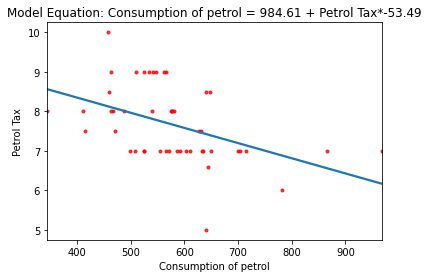

In [48]:
## Addition to all of these, you can see the details in the plot attached below. 
## There is a negative regression between Consumption of petrol and Petrol Tax...


g = sns.regplot(dataset["Petrol_Consumption"], dataset["Petrol_tax"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Equation: Consumption of petrol = 984.61 + Petrol Tax*-53.49")
g.set_ylabel("Petrol Tax")
g.set_xlabel("Consumption of petrol")

## Preparing the Data
The next step is to divide the data into attributes and labels as we did previously. However, unlike last time, this time around we are going to use column names for creating an attribute set and label. Execute the following script:

Execute the following code to divide our data into training and test sets:

In [12]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Algorithm
And finally, to train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class:

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

As said earlier, in case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

In [15]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


This means that for a unit increase in "petrol_tax", there is a decrease of 24.19 million gallons in gas consumption. Similarly, a unit increase in proportion of population with a drivers license results in an increase of 1.324 billion gallons of gas consumption. We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption.

## Making Predictions
To make pre-dictions on the test data, execute the following script:

In [16]:
y_pred = regressor.predict(X_test)

#### To compare the actual output values for X_test with the predicted values, execute the following script:

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [18]:
print(regressor.coef_, regressor.intercept_)

[-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03] 425.59933220324206


In [19]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4666.344787588362
56.8222474789647
68.31064915215168


In [25]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
l.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred_1=l.predict(x_test)
print(y_pred_1)

[594.68473673 657.94626287 578.77796233 577.56584838 524.60050741
 632.85908374 575.96166242 649.04536273 556.09293684 525.54298676
 497.98650117 529.61281259 361.20860179 714.01098433 608.17110324]


In [30]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))

89.87028997591273


## Evaluating the Algorithm
The final step is to evaluate the performance of algorithm. We'll do this by finding the values for MAE, MSE and RMSE. Execute the following script

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168


You can see that the value of root mean squared error is 60.07, which is slightly greater than 10% of the mean value of the gas consumption in all states. This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, a few of which are listed here:

1. Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.
2. Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
3. Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

## Conclusion
In this article we studied on of the most fundamental machine learning algorithms i.e. linear regression. We implemented both simple linear regression and multiple linear regression with the help of the Scikit-Learn machine learning library.

There are a few things you can do from here:

1. Play around with the code and data in this article to see if you can improve the results (try changing the training/test size, transform/scale input features, etc.)
2. Seek out some more complete resources on machine learning techniques, like the Deep Learning A-Z: Hands-On Artificial Neural Networks and Python for Data Science and Machine Learning Bootcamp courses, which will also teach you how to use Scikit-Learn and other popular ML libraries
3. Download and play with some other regression datasets to see what kind of results you can get out of those. The more experience the better!